## In this assignment, you will write Python scripts to download Tweets for any Twitter account OR News using any News API. Then, on the downloaded tweets, you need to apply the following:
1.	Cleaning of the tweets or News
2.	Apply LDA for topic modeling; you can run LDA for 10-15 topics.
3.	Based on the Topic\term strength, you need to create a word cloud
4.	When a word is clicked, then it should display the related tweets for that word.


## Step 1 : - Scrapping the Tweets from twitter using NTScraper  

In [71]:
# installing the required library 

In [1]:
pip install ntscraper

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing required libraries 
from ntscraper import Nitter
import pandas as pd

16-Jun-24 15:05:15 - NumExpr defaulting to 8 threads.


### The message indicates that NumExpr is set to use 8 threads by default for its computations. This number corresponds to the number of threads it will use to execute operations in parallel.



In [19]:
#function to scrape tweets of a user
def create_tweets_dataset(username,no_of_tweets):
        scraper = Nitter()
        tweets = scraper.get_tweets(username,mode ="user", number = no_of_tweets )
            # Creating a Dictionary to store the tweets data in to a CSV
        data = {
            'link': [],
            'text': [],
            'user': [],
            'likes': [],
            'quotes': [],
            'retweets': [],
            'comments': []
        }

        for tweet in tweets['tweets']:
            data['link'].append(tweet['link'])
            data['text'].append(tweet['text'])
            data['user'].append(tweet['user']['name'])
            data['likes'].append(tweet['stats']['likes'])
            data['retweets'].append(tweet['stats']['retweets'])
            data['quotes'].append(tweet['stats']['quotes'])
            data['comments'].append(tweet['stats']['comments'])

        df= pd.DataFrame(data)
        df.to_csv(username + "_tweets_data.csv")
        print(f"Completed scraping. '{username}_tweets_data.csv' is ready!")

In [20]:
create_tweets_dataset("elonmusk",100)

Testing instances: 100%|████████████████████████| 77/77 [00:38<00:00,  2.00it/s]

13-Jun-24 01:43:33 - No instance specified, using random instance https://nitter.privacydev.net


13-Jun-24 01:43:37 - Current stats for elonmusk: 20 tweets, 0 threads...
13-Jun-24 01:43:41 - Current stats for elonmusk: 40 tweets, 0 threads...
13-Jun-24 01:43:45 - Current stats for elonmusk: 60 tweets, 0 threads...
13-Jun-24 01:43:49 - Current stats for elonmusk: 80 tweets, 0 threads...
13-Jun-24 01:43:53 - Current stats for elonmusk: 100 tweets, 0 threads...
Completed scraping. 'elonmusk_tweets_data.csv' is ready!


## Trying to scrape in batches

In [5]:
import pandas as pd
from ntscraper import Nitter
import time

def collect_tweets(username, total_tweets=1000, batch_size=100):
    scraper = Nitter()
    data = {
        'link': [],
        'text': [],
        'user': [],
        'likes': [],
        'quotes': [],
        'retweets': [],
        'comments': []
    }
    
    fetched_tweets = 0
    seen_links = set()
    retry_count = 0
    max_retries = 3

    while fetched_tweets < total_tweets and retry_count < max_retries:
        tweets = scraper.get_tweets(username, mode="user", number=batch_size)
        if not tweets['tweets']:
            break
        
        new_tweets_count = 0

        for tweet in tweets['tweets']:
            tweet_link = tweet['link']
            if tweet_link not in seen_links:
                data['link'].append(tweet['link'])
                data['text'].append(tweet['text'])
                data['user'].append(tweet['user']['name'])
                data['likes'].append(tweet['stats']['likes'])
                data['retweets'].append(tweet['stats']['retweets'])
                data['quotes'].append(tweet['stats']['quotes'])
                data['comments'].append(tweet['stats']['comments'])
                seen_links.add(tweet_link)
                new_tweets_count += 1
        
        fetched_tweets += new_tweets_count
        if new_tweets_count == 0:
            retry_count += 1
        else:
            retry_count = 0
        
        time.sleep(2)
    
    df = pd.DataFrame(data)
    df.to_csv(f"{username}_tweets.csv", index=False)
    print(f"Data saved to {username}_tweets.csv with {fetched_tweets} tweets.")
    return df


In [30]:
collect_tweets("PMOIndia")


Testing instances: 100%|████████████████████████| 77/77 [00:38<00:00,  2.00it/s]

08-Jun-24 00:27:52 - No instance specified, using random instance https://nitter.privacydev.net


08-Jun-24 00:27:58 - Current stats for PMOIndia: 20 tweets, 0 threads...
08-Jun-24 00:28:02 - Current stats for PMOIndia: 40 tweets, 0 threads...
08-Jun-24 00:28:06 - Current stats for PMOIndia: 60 tweets, 0 threads...
08-Jun-24 00:28:08 - Empty page on https://nitter.privacydev.net
08-Jun-24 00:28:12 - No instance specified, using random instance https://nitter.privacydev.net
08-Jun-24 00:28:17 - Current stats for PMOIndia: 20 tweets, 0 threads...
08-Jun-24 00:28:21 - Current stats for PMOIndia: 40 tweets, 0 threads...
08-Jun-24 00:28:25 - Current stats for PMOIndia: 60 tweets, 0 threads...
08-Jun-24 00:28:26 - Empty page on https://nitter.privacydev.net
08-Jun-24 00:28:30 - No instance specified, using random instance https://nitter.privacydev.net
08-Jun-24 00:28:35 - Current stats for PMOIndia: 20 tweets, 0 threads...
08-Jun-24 00:28:39 - Current stats for PMOIndia: 40 tweets, 0 threads...
08-Jun-24 00:28:43 - Current stats for PMOIndia: 60 tweets, 0 threads...
08-Jun-24 00:28:44 - 

link  \
0   https://twitter.com/PMOIndia/status/1796582139...   
1   https://twitter.com/PMOIndia/status/1796149100...   
2   https://twitter.com/PMOIndia/status/1794624746...   
3   https://twitter.com/PMOIndia/status/1794624682...   
4   https://twitter.com/PMOIndia/status/1773624000...   
5   https://twitter.com/PMOIndia/status/1772166701...   
6   https://twitter.com/PMOIndia/status/1768251886...   
7   https://twitter.com/PMOIndia/status/1768250291...   
8   https://twitter.com/PMOIndia/status/1768249643...   
9   https://twitter.com/PMOIndia/status/1768248366...   
10  https://twitter.com/narendramodi/status/176824...   
11  https://twitter.com/PMOIndia/status/1768173647...   
12  https://twitter.com/narendramodi/status/176787...   
13  https://twitter.com/PMOIndia/status/1767790965...   
14  https://twitter.com/PMOIndia/status/1767789352...   
15  https://twitter.com/PMOIndia/status/1767789196...   
16  https://twitter.com/narendramodi/status/176778...   
17  https://twitter.com/PMOIndia/status/1767482913...   
18  https://twitter.com/PMOIndia/status/1767482365...   
19  https://twitter.com/PMOIndia/status/1767482136...   
20  https://twitter.com/narendramodi/status/176748...   
21  https://twitter.com/PMOIndia/status/1767430760...   
22  https://twitter.com/PMOIndia/status/1767429448...   
23  https://twitter.com/PMOIndia/status/1767427231...   
24  https://twitter.com/narendramodi/status/176742...   
25  https://twitter.com/PMOIndia/status/1767426805...   
26  https://twitter.com/PMOIndia/status/1767406550...   
27  https://twitter.com/PMOIndia/status/1767405831...   
28  https://twitter.com/narendramodi/status/176740...   
29  https://twitter.com/PMOIndia/status/1767107280...   
30  https://twitter.com/PMOIndia/status/1767106036...   
31  https://twitter.com/PMOIndia/status/1767104779...   
32  https://twitter.com/PMOIndia/status/1767103823...   
33  https://twitter.com/narendramodi/status/176710...   
34  https://twitter.com/PMOIndia/status/1767066166...   
35  https://twitter.com/PMOIndia/status/1767065772...   
36  https://twitter.com/PMOIndia/status/1767065624...   
37  https://twitter.com/PMOIndia/status/1767063137...   
38  https://twitter.com/narendramodi/status/176706...   
39  https://twitter.com/narendramodi/status/176674...   
40  https://twitter.com/PMOIndia/status/1766723404...   
41  https://twitter.com/PMOIndia/status/1766721732...   
42  https://twitter.com/PMOIndia/status/1766721413...   
43  https://twitter.com/narendramodi/status/176671...   
44  https://twitter.com/narendramodi/status/176642...   
45  https://twitter.com/PMOIndia/status/1766375621...   
46  https://twitter.com/PMOIndia/status/1766373481...   
47  https://twitter.com/PMOIndia/status/1766373205...   
48  https://twitter.com/PMOIndia/status/1766372997...   
49  https://twitter.com/narendramodi/status/176637...   
50  https://twitter.com/PMOIndia/status/1766342020...   
51  https://twitter.com/PMOIndia/status/1766341010...   
52  https://twitter.com/PMOIndia/status/1766340333...   
53  https://twitter.com/narendramodi/status/176633...   
54  https://twitter.com/PMOIndia/status/1765991079...   
55  https://twitter.com/PMOIndia/status/1765988763...   
56  https://twitter.com/PMOIndia/status/1765985069...   
57  https://twitter.com/narendramodi/status/176598...   
58  https://twitter.com/PMOIndia/status/1765771335...   
59  https://twitter.com/PMOIndia/status/1765769155...   

                                                 text           user  likes  \
0   An ex-gratia of Rs. 2 lakh from PMNRF would be...      PMO India   3281   
1   Anguished by the loss of lives due to a bus mi...      PMO India   1616   
2   In the wake of the fire tragedy at a hospital ...      PMO India   1675   
3   PM @narendramodi has announced an ex-gratia of...      PMO India   1476   
4   PM @narendramodi has expressed grief on the ac...      PMO India   2750   
5   उज्जैन के महाकाल मंदिर में हुई दुर्घटना अत्यंत...      PMO India   6421   
6   खेलो इंडिया यो

## But still no use we are able to scrape only 100 tweets coz ntscraper has limit of 100 tweets on free version 

## Step 2 : - Cleaning of the tweets

In [15]:
# Importing Libraries
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/salmanmohamm3d/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/salmanmohamm3d/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/salmanmohamm3d/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
df = pd.read_csv('/Users/salmanmohamm3d/Desktop/Social M A/assignment part2 /elonmusk_tweets_data.csv')

In [7]:
def clean_tweet(tweet):
    if pd.isna(tweet): #if the text column contains NAN values it will return empty
        return ''
    #Removing URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)
    # Removing special characters and numbers
    tweet = re.sub(r'[^\w\s]', '', tweet)
    #Tokenizing
    tokens = word_tokenize(tweet)
    #Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    #Lemmatizing
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    #Joining tokens back into a string
    clean_tweet = ' '.join(tokens)
    
    return clean_tweet


df['cleaned_text'] = df['text'].apply(clean_tweet)
df.to_csv('cleaned_tweets.csv', index=False)
print("cleaned_tweets.csv is ready!")

cleaned_tweets.csv is ready!


## Step 4 : - Appling LDA for topic modeling

In [11]:
# importing libraries
from gensim.models import LdaModel
from gensim.corpora import Dictionary

In [12]:
#creating a dictionary of terms and tokenizing
tokenize_tweets = [i.split() for i in df['cleaned_text']]
dictionary = Dictionary(tokenize_tweets)

#creating a bag of words representation of corpus
corpus = [dictionary.doc2bow(i) for i in tokenize_tweets]

# Applying LDA with number of topics = 15
num_topics = 15  
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)


16-Jun-24 15:06:04 - adding document #0 to Dictionary<0 unique tokens: []>
16-Jun-24 15:06:04 - built Dictionary<735 unique tokens: ['link', 'share', '3', '600', 'Farm']...> from 100 documents (total 1170 corpus positions)
16-Jun-24 15:06:04 - Dictionary lifecycle event {'msg': "built Dictionary<735 unique tokens: ['link', 'share', '3', '600', 'Farm']...> from 100 documents (total 1170 corpus positions)", 'datetime': '2024-06-16T15:06:04.863823', 'gensim': '4.3.0', 'python': '3.11.7 (main, Dec 15 2023, 12:09:56) [Clang 14.0.6 ]', 'platform': 'macOS-15.0-arm64-arm-64bit', 'event': 'created'}
16-Jun-24 15:06:04 - using symmetric alpha at 0.06666666666666667
16-Jun-24 15:06:04 - using symmetric eta at 0.06666666666666667
16-Jun-24 15:06:04 - using serial LDA version on this node
16-Jun-24 15:06:04 - running online (single-pass) LDA training, 15 topics, 1 passes over the supplied corpus of 100 documents, updating model once every 100 documents, evaluating perplexity every 100 documents, it

## Step 5 : - Creating a word Cloud based on the Topic Strength 

In [13]:
# importing libraries
from wordcloud import WordCloud
import plotly.express as px

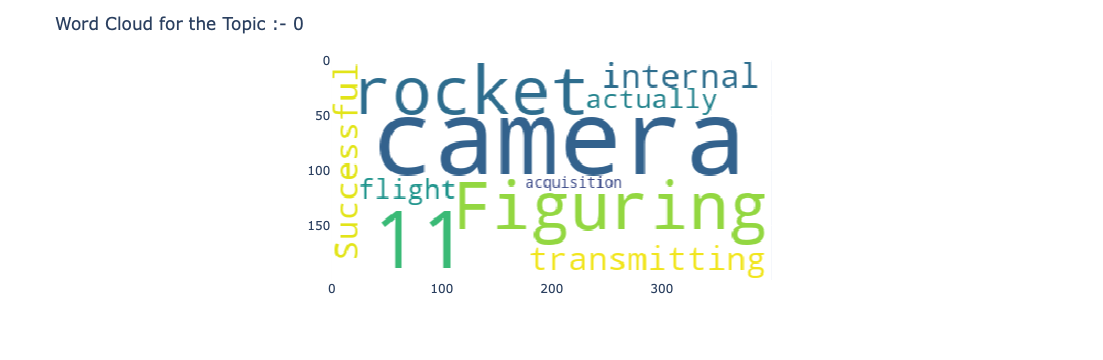

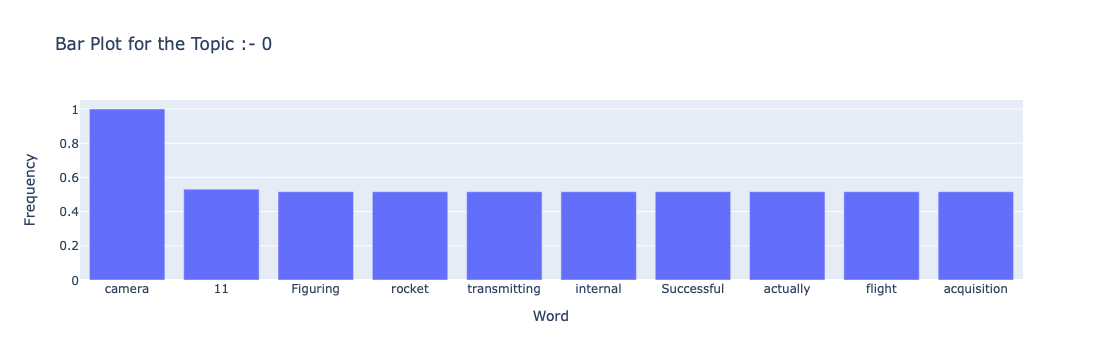

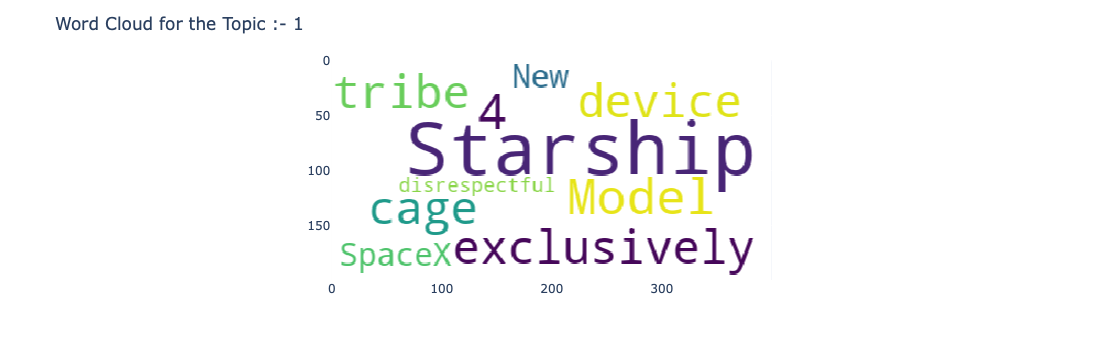

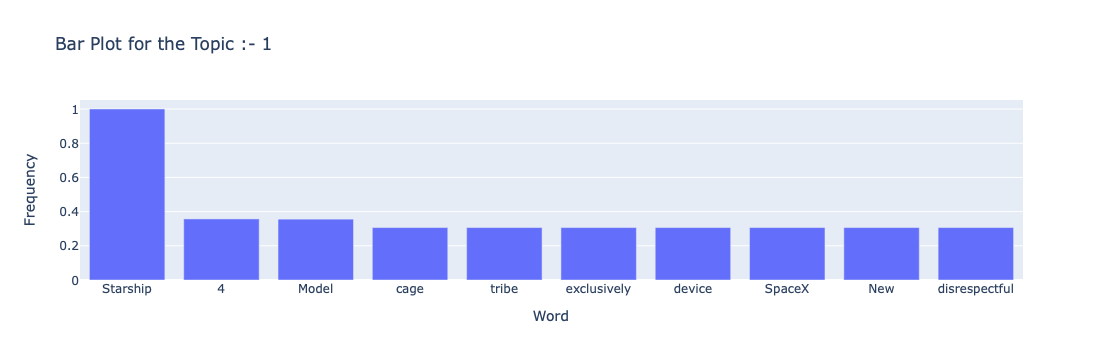

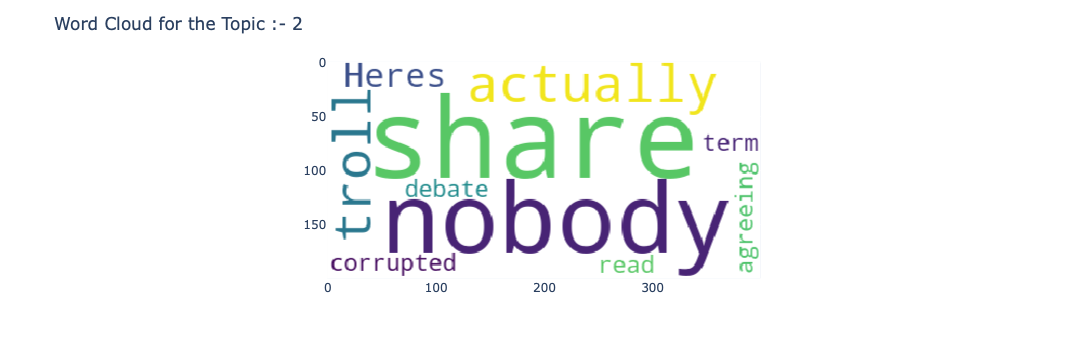

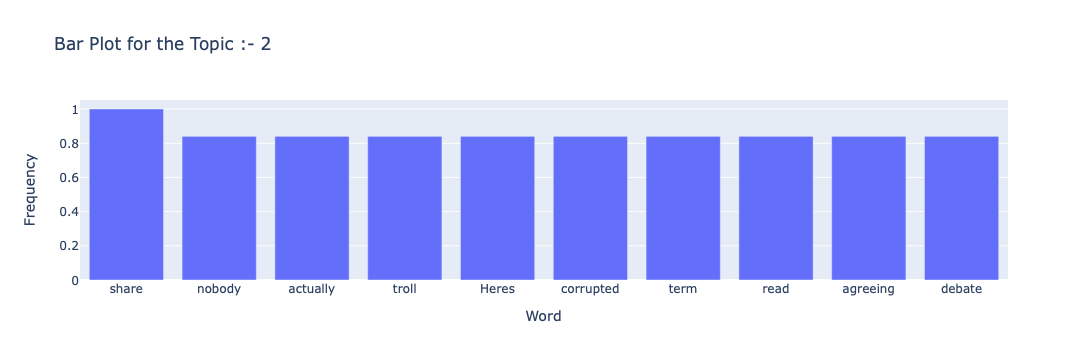

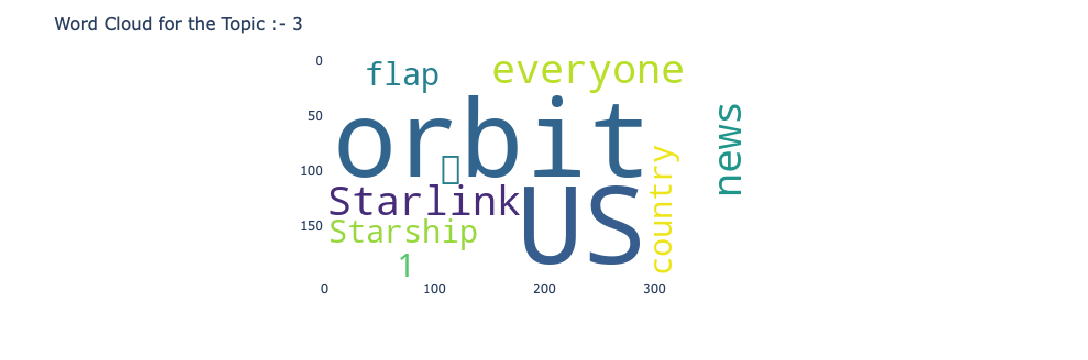

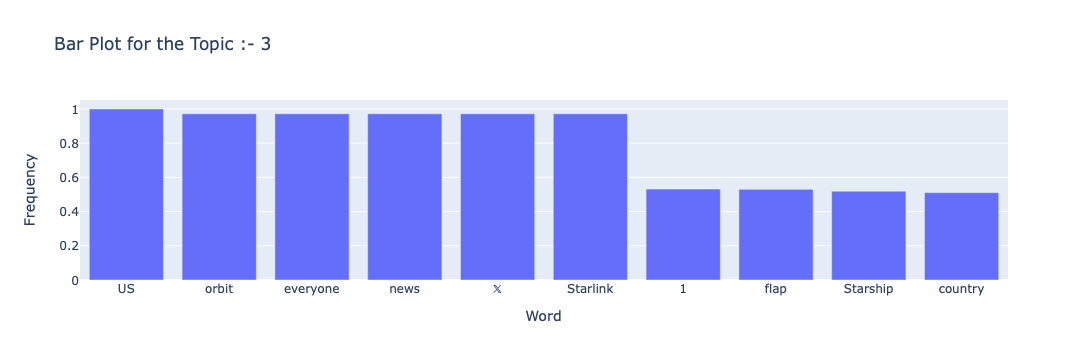

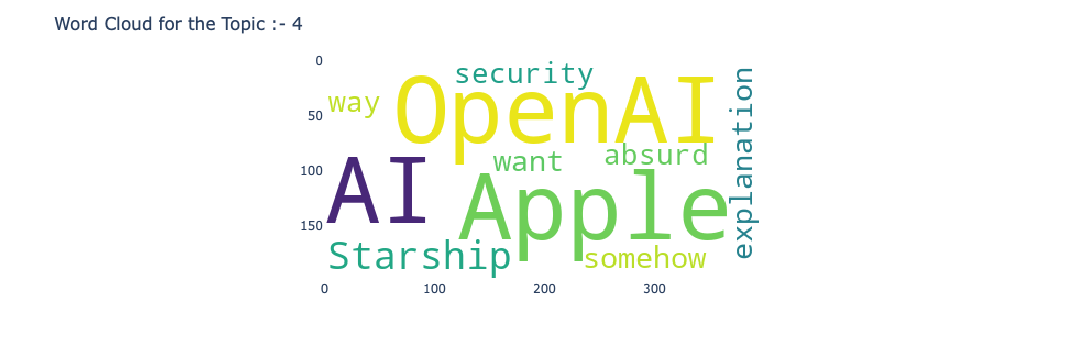

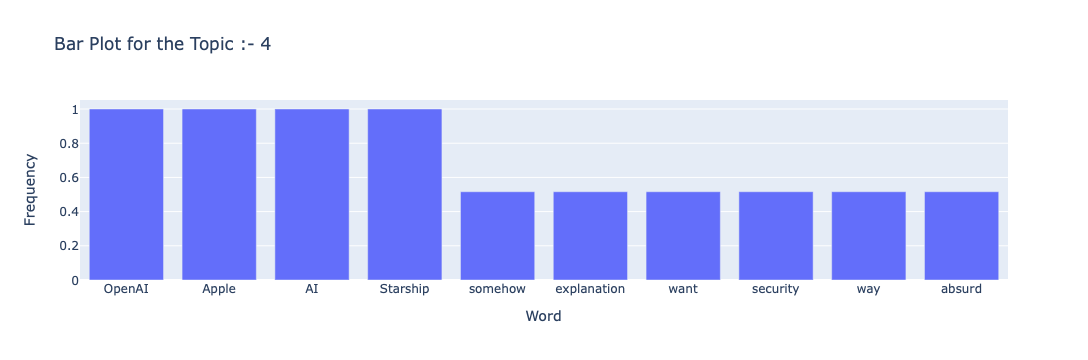

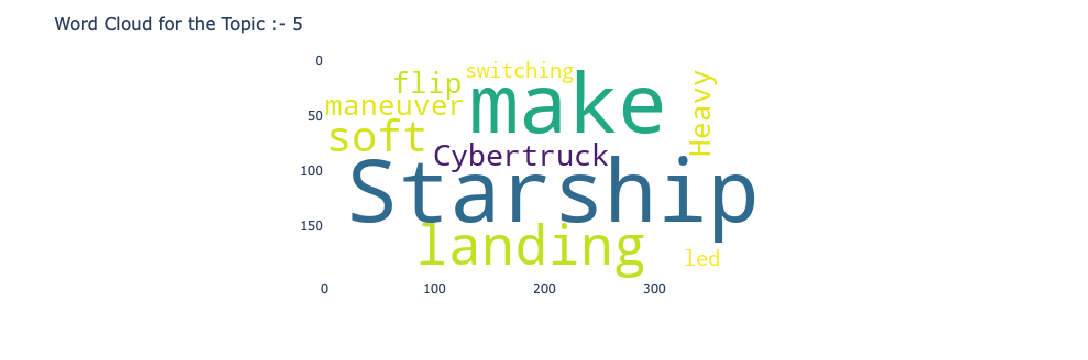

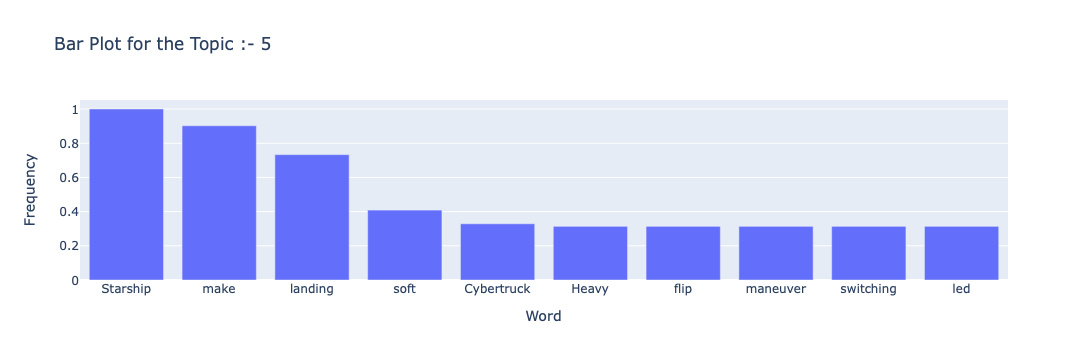

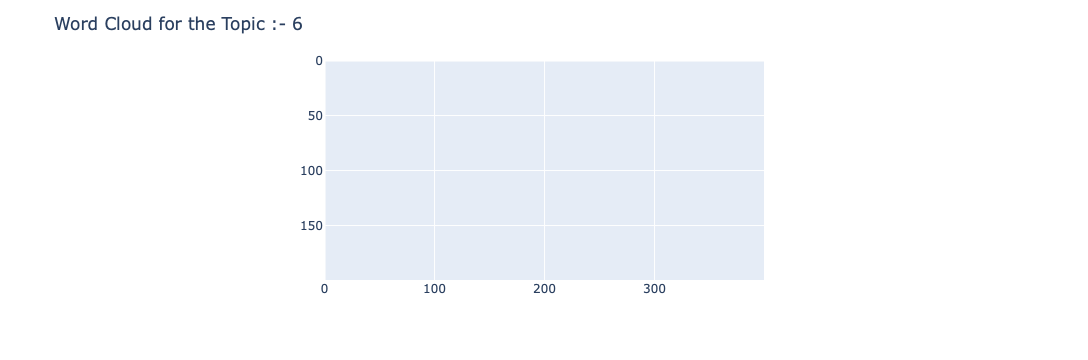

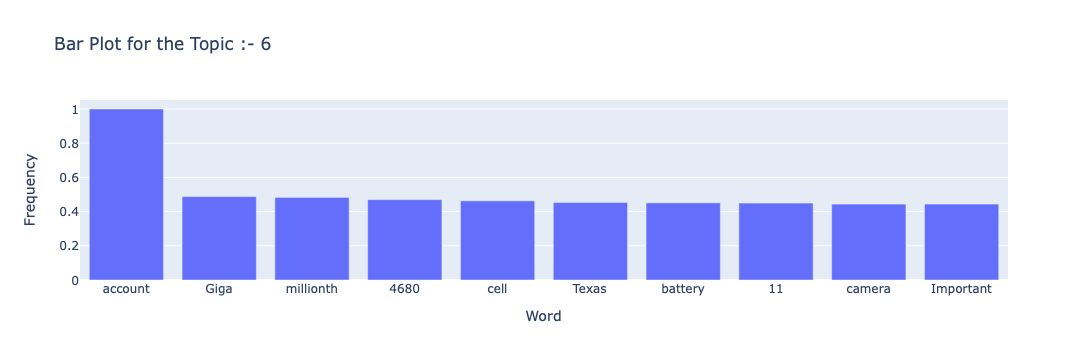

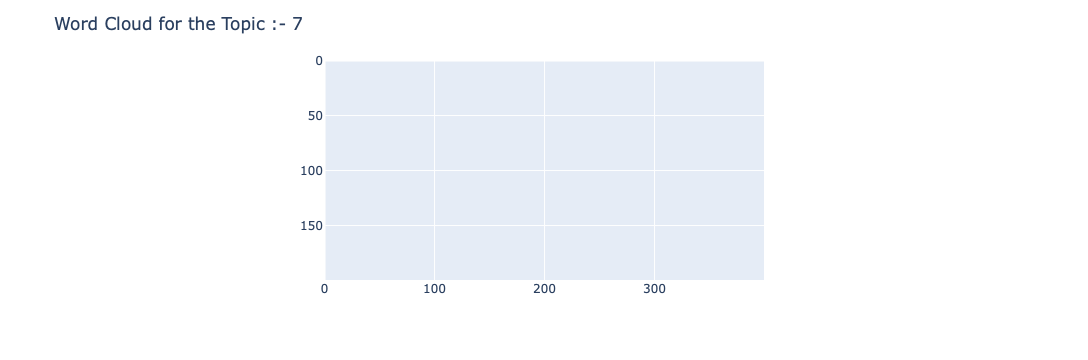

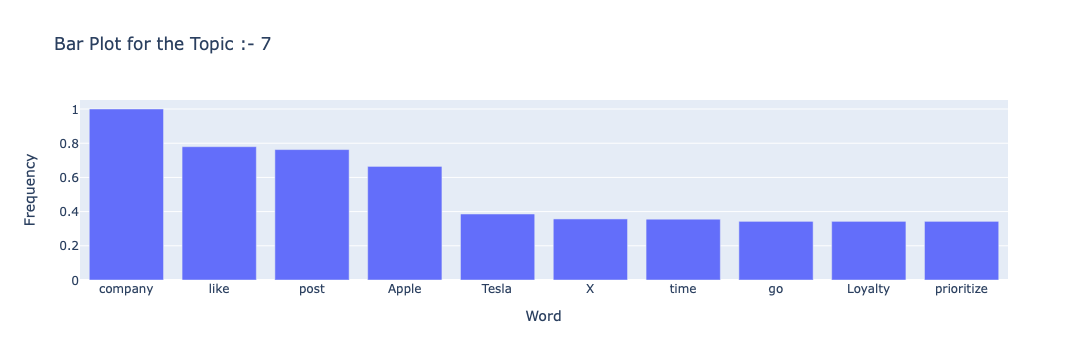

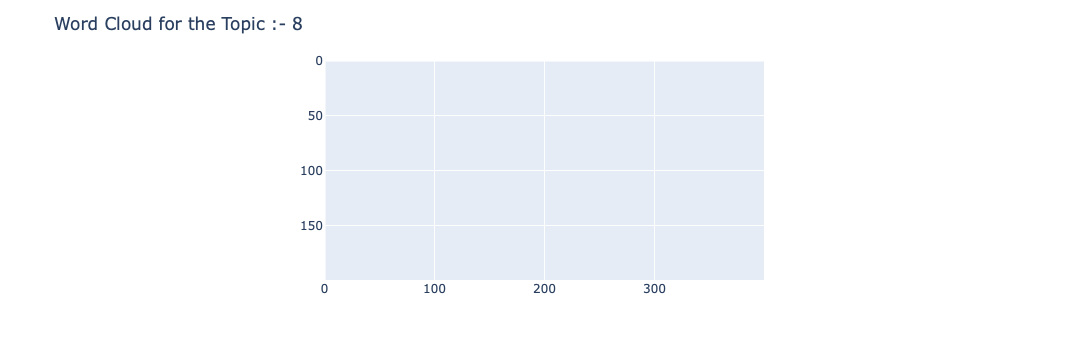

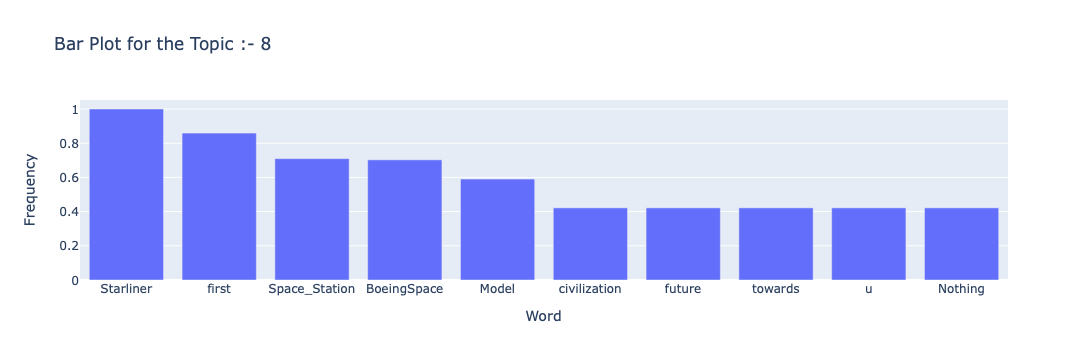

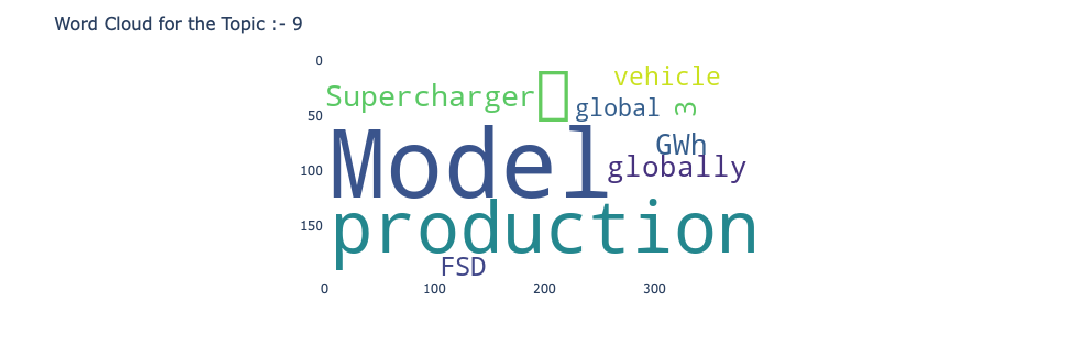

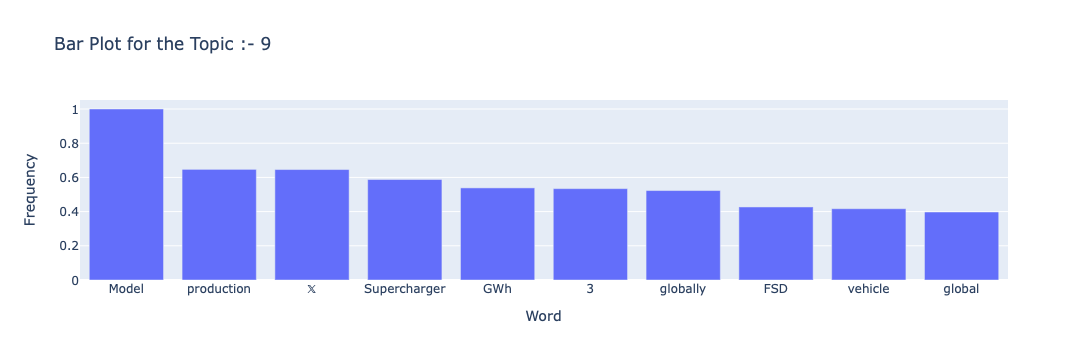

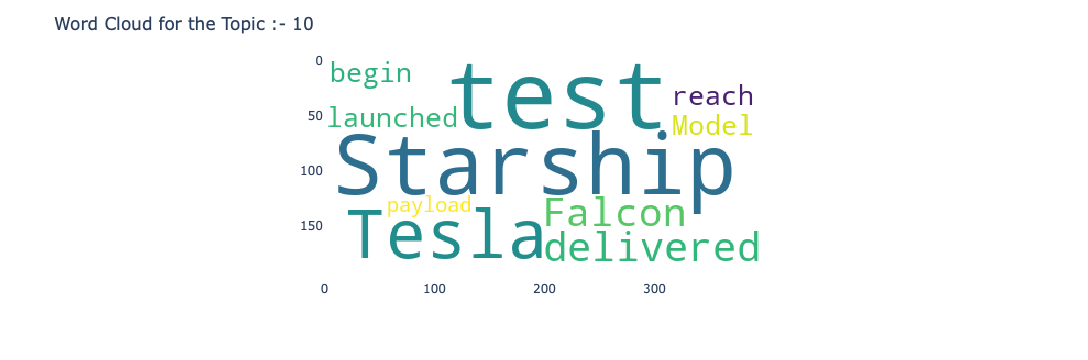

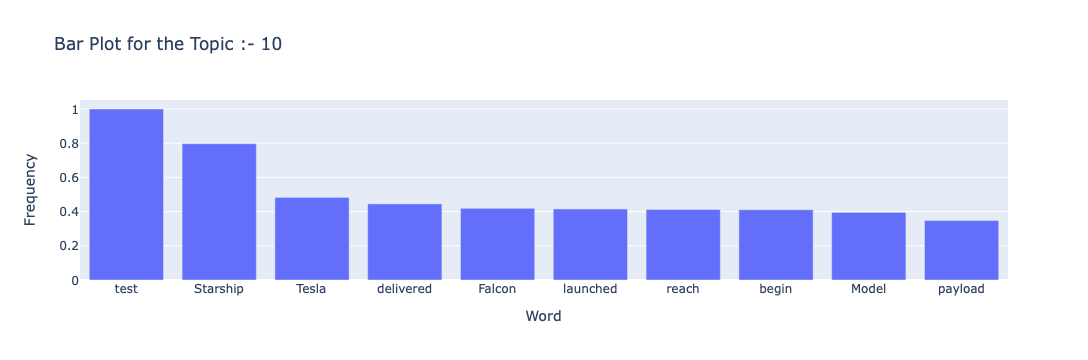

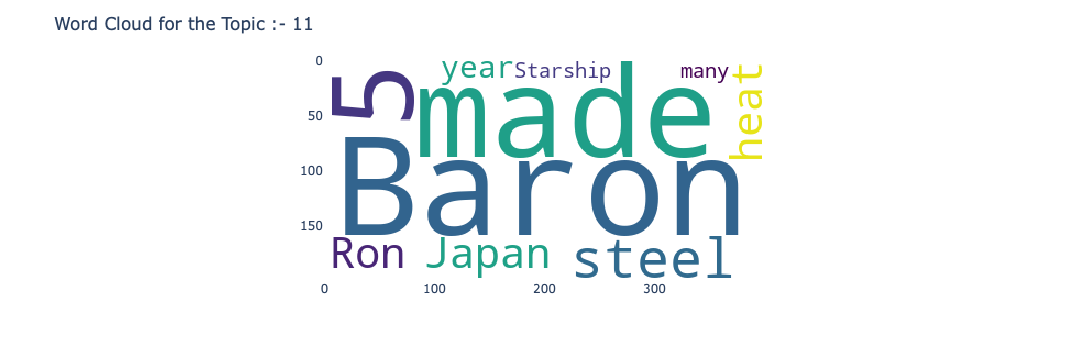

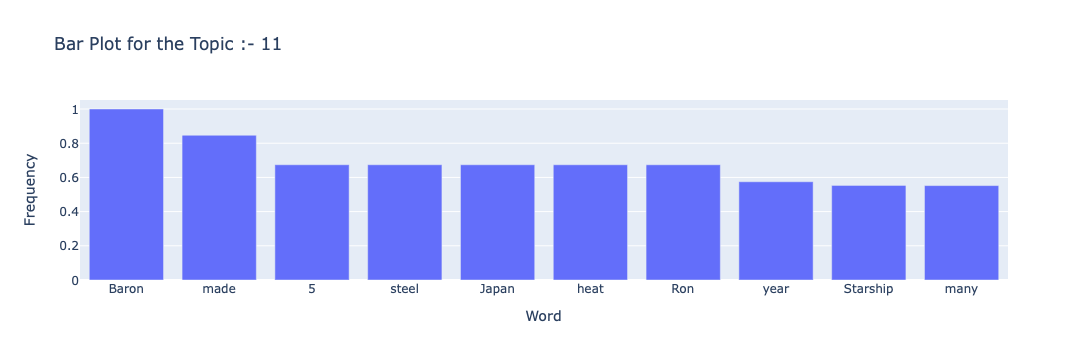

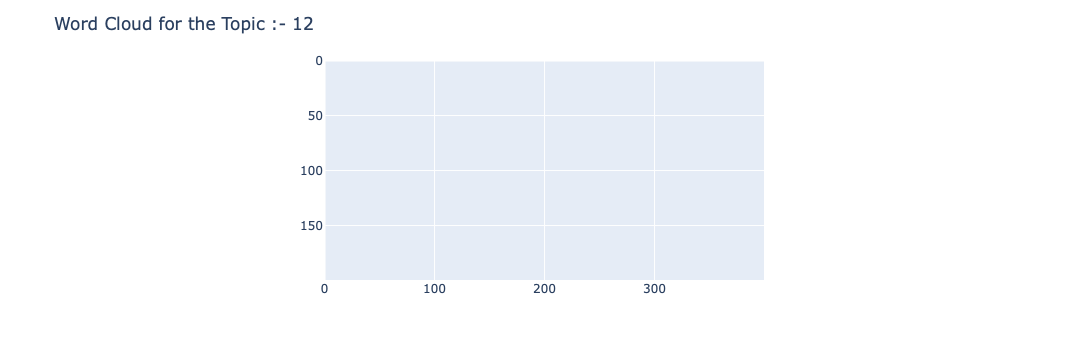

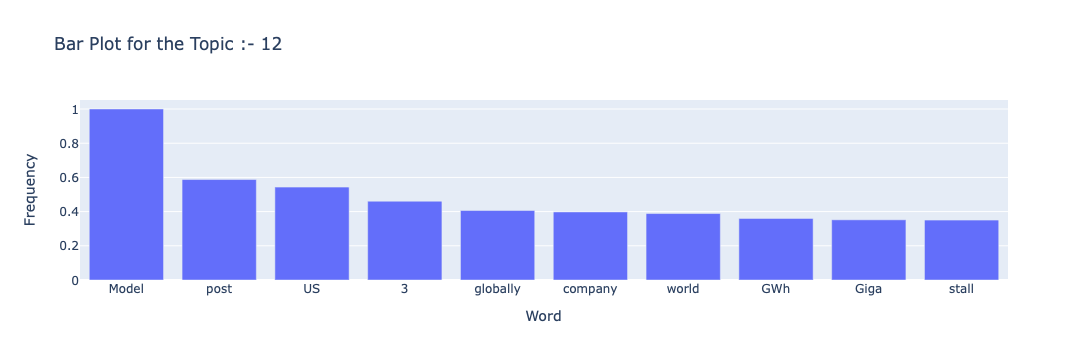

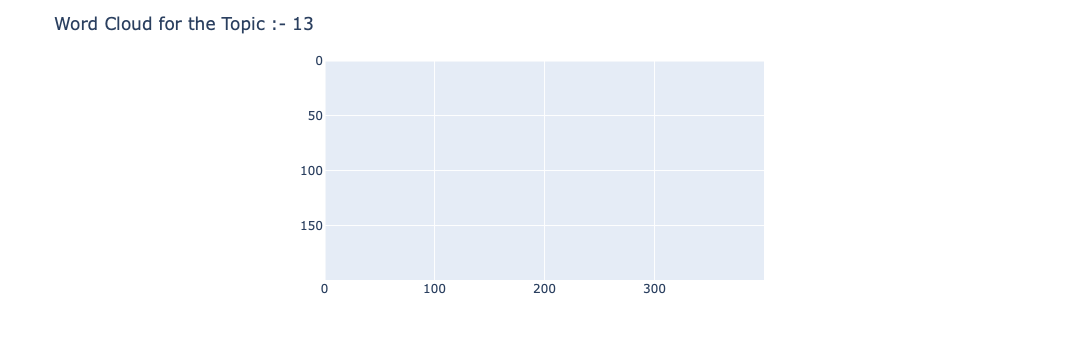

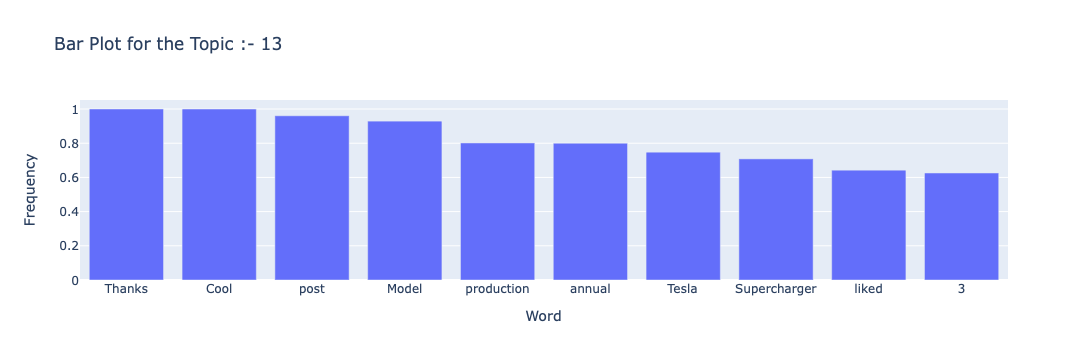

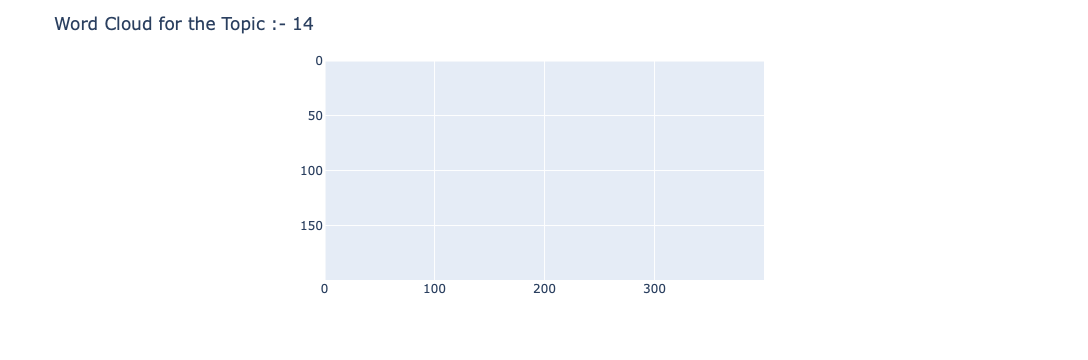

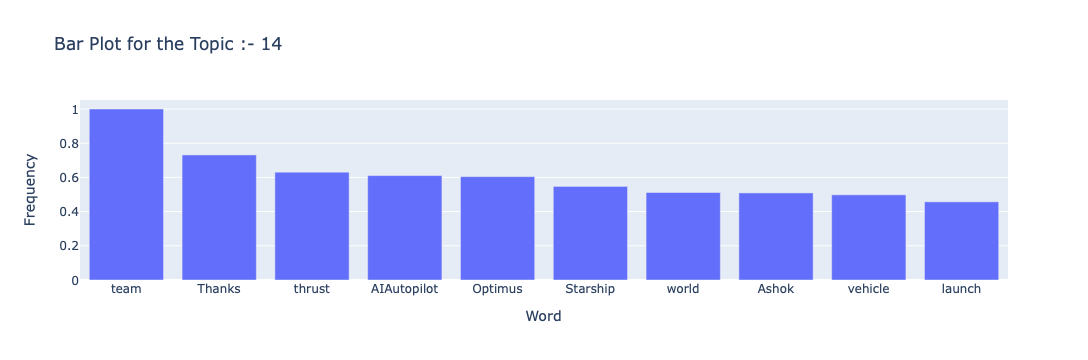

In [16]:
stopwords = set(stopwords.words('english'))

# Creating word clouds and bar plots for each topic
for topic_id in range(lda_model.num_topics):
    #generate a word cloud image
    wordcloud_dict = dict(lda_model.show_topic(topic_id, 10))
    wordcloud = WordCloud(background_color="white", stopwords = stopwords ).generate_from_frequencies(wordcloud_dict)
    
    #converting word cloud to plotlyexpress format
    word_freq_tuples = [(word, freq) for word, freq in wordcloud.words_.items()]
    wordcloud_df = pd.DataFrame(word_freq_tuples, columns=['word', 'frequency'])
    
    #plotting a word cloud
    fig_wordcloud = px.imshow(wordcloud)
    fig_wordcloud.update_layout(title=f"Word Cloud for the Topic :- {topic_id}")
    fig_wordcloud.show()
    
    #bar plot for each topic
    fig_bar = px.bar(wordcloud_df, x='word', y='frequency', title=f"Bar Plot for the Topic :- {topic_id}",
                     labels={'word': 'Word', 'frequency': 'Frequency'})
    fig_bar.show()


## Step 6 : - Displaying all related tweets when a selected word is given as input from the Word Cloud.

## Printing related tweets & number of tweets for the given word from the word cloud

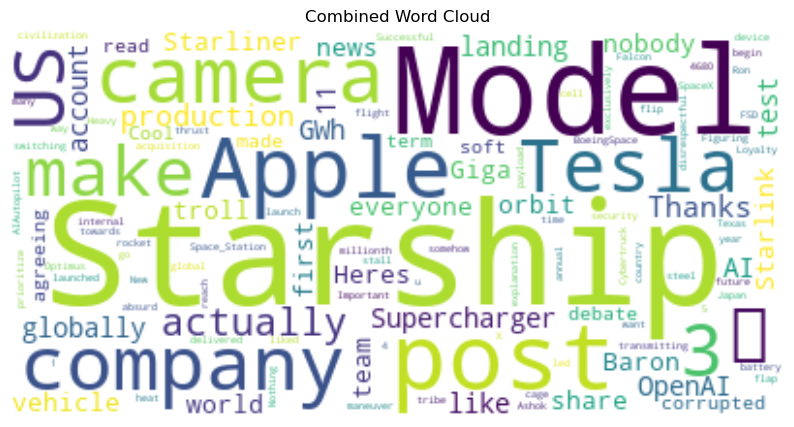

Enter a word from the word cloud:  Apple


Number of tweets containing 'Apple': 3
It’s patently absurd that Apple isn’t smart enough to make their own AI, yet is somehow capable of ensuring that OpenAI will protect your security & privacy!  Apple has no clue what’s actually going on once they hand your data over to OpenAI. They’re selling you down the river.
And visitors will have to check their Apple devices at the door, where they will be stored in a Faraday cage
If Apple integrates OpenAI at the OS level, then Apple devices will be banned at my companies. That is an unacceptable security violation.


In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Aggregate words from all topics to create a single word cloud
all_words = {}
tweet_count = 0  # Initialize tweet count
for topic_id in range(lda_model.num_topics):
    wordcloud_dict = dict(lda_model.show_topic(topic_id, 10))
    for word, freq in wordcloud_dict.items():
        all_words[word] = all_words.get(word, 0) + freq

# Generate word cloud image from aggregated words
wordcloud = WordCloud(background_color="white", stopwords=stopwords).generate_from_frequencies(all_words)

# Plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Combined Word Cloud')
plt.show()

# Define function to display related tweets for a given word
def display_related_tweets(word):
    related_tweets = df[df['cleaned_text'].str.contains(word)]
    tweet_count = related_tweets.shape[0]  # Get the number of related tweets
    print(f"Number of tweets containing '{word}': {tweet_count}")
    for tweet in related_tweets['text']:
        print(tweet)

# Get input word from user
word_clicked = input("Enter a word from the word cloud: ")

# Display related tweets for the input word
display_related_tweets(word_clicked)


## Creating a Data Frame which consists  of word and their frequency 

In [18]:
import pandas as pd
from wordcloud import WordCloud
import plotly.express as px

# Initialize an empty dictionary to store word frequency data
word_freq_dict = {'Topic': [], 'Word': [], 'Frequency': []}

# Creating word clouds and bar plots for each topic
for topic_id in range(lda_model.num_topics):
    # Generate word cloud image
    wordcloud_dict = dict(lda_model.show_topic(topic_id, 10))
    
    # Add topic ID to the dictionary
    topic_word_freq_data = {'Topic': f"Topic {topic_id}"}
    
    # Update the dictionary with word frequency data
    for word, freq in wordcloud_dict.items():
        topic_word_freq_data['Word'] = word
        topic_word_freq_data['Frequency'] = freq
        word_freq_dict['Topic'].append(topic_word_freq_data['Topic'])
        word_freq_dict['Word'].append(topic_word_freq_data['Word'])
        word_freq_dict['Frequency'].append(topic_word_freq_data['Frequency'])

# Convert dictionary to DataFrame
word_freq_data = pd.DataFrame(word_freq_dict)

# Print the DataFrame
print(word_freq_data)


        Topic          Word  Frequency
0     Topic 0        camera   0.023851
1     Topic 0            11   0.012664
2     Topic 0      Figuring   0.012310
3     Topic 0        rocket   0.012310
4     Topic 0  transmitting   0.012310
..        ...           ...        ...
145  Topic 14      Starship   0.008522
146  Topic 14         world   0.007966
147  Topic 14         Ashok   0.007928
148  Topic 14       vehicle   0.007755
149  Topic 14        launch   0.007118

[150 rows x 3 columns]


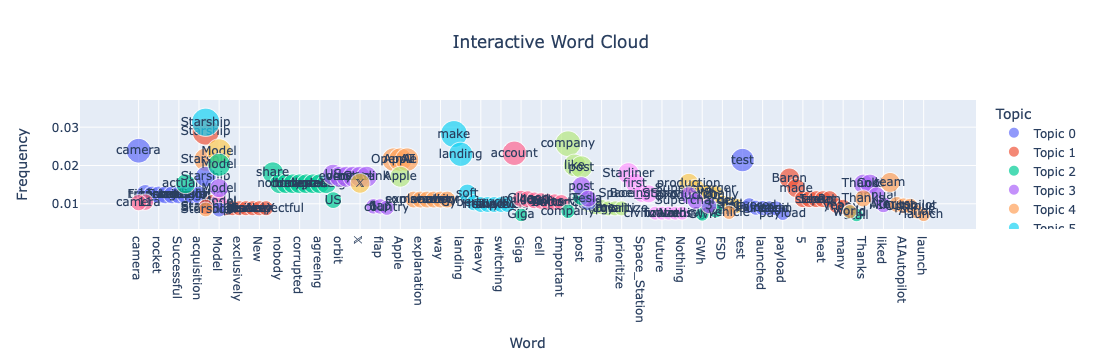

In [19]:
import pandas as pd
import plotly.express as px


word_freq_data_1 = word_freq_data

# Function to display related tweets for a given word
def display_related_tweets(word):
    # Add your logic here to display related tweets for the clicked word
    print(f"Related tweets for the word '{word}'")

# Plot the interactive word cloud
fig = px.scatter(word_freq_data_1, x='Word', y='Frequency', text='Word', size='Frequency', color='Topic', 
                 title='Interactive Word Cloud')
fig.update_traces(marker={'opacity': 0.5}, selector=dict(mode='markers'))
fig.update_layout(
    title={'x': 0.5, 'y': 0.9, 'xanchor': 'center', 'yanchor': 'top'},
    hoverlabel={'bgcolor': 'white', 'font_size': 16, 'font_family': 'Arial'},
    hovermode='closest'
)
fig.update_traces(textposition='middle center', selector=dict(type='scatter', mode='markers'))
fig.show()
